# Missing values base performance plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Admission model

0.508165468457588
0.7150490582912457


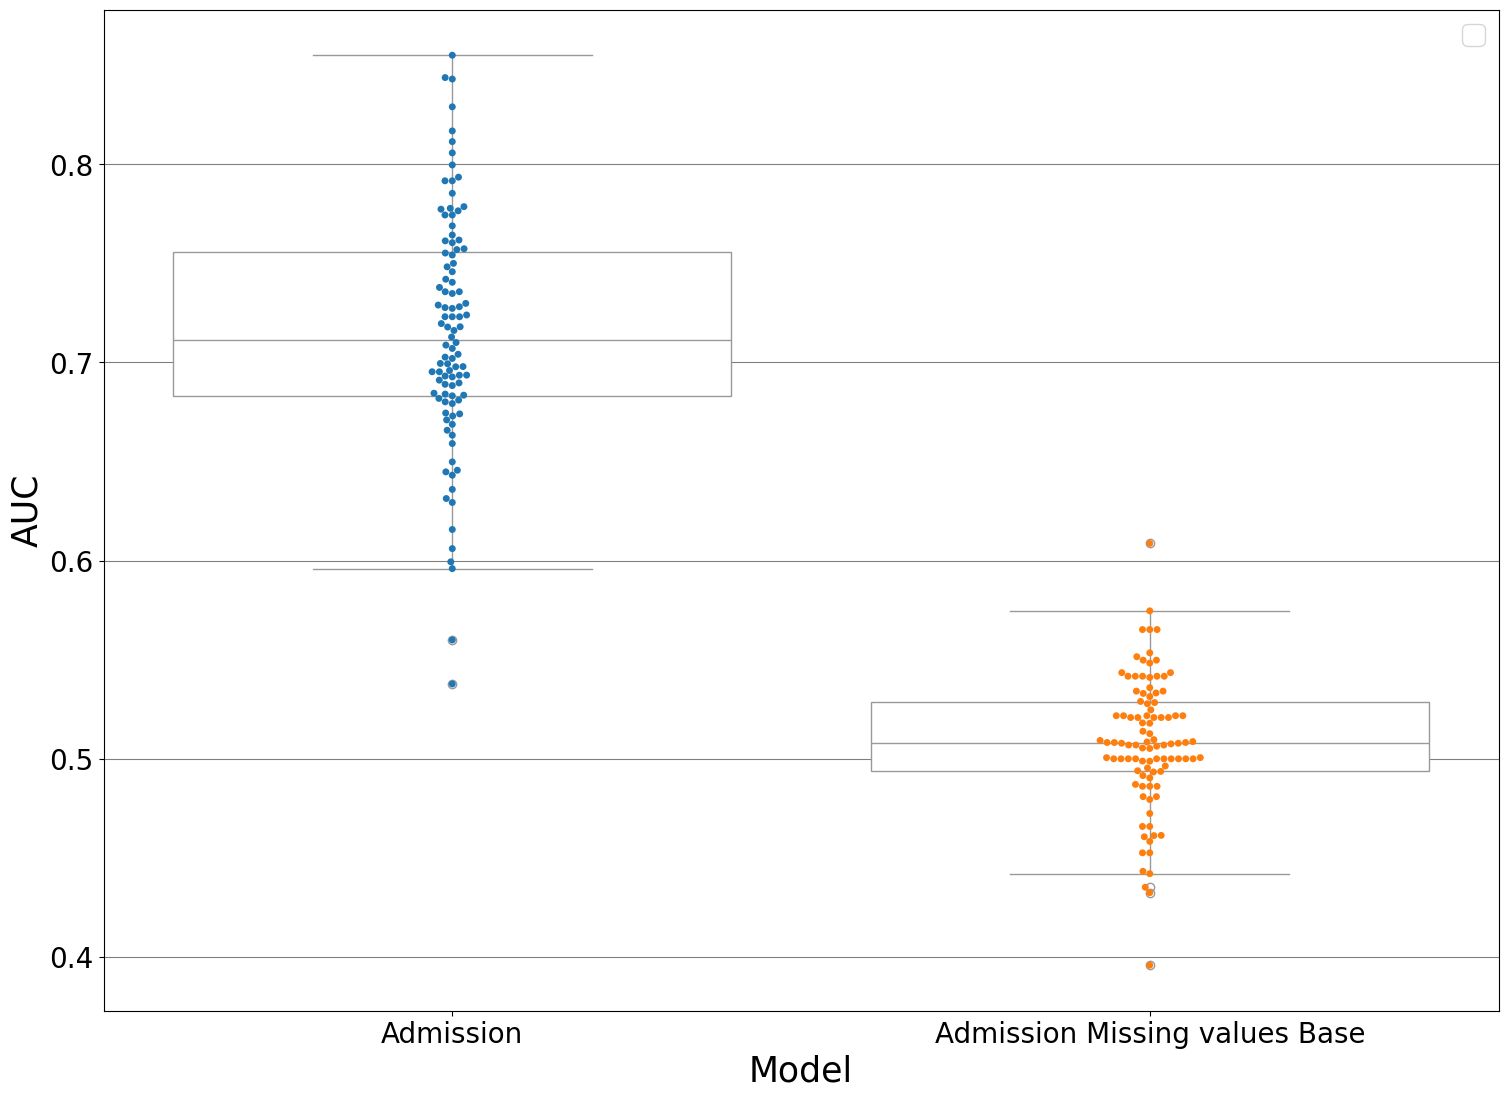

In [2]:

data_dir = "../../code/missing_value_analysis/output/missing_values/"

results_missing = pd.read_csv(data_dir +"Admission_base_missing.csv", index_col=0)
results_missing["Model"] = "Admission Missing values Base"
data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"

results_admission = pd.read_csv(data_dir + "Admission_random_remove.csv", index_col=0)
results_admission = results_admission[results_admission["Thresholds"] == 0.5]
results_admission = results_admission[results_admission["Number of Removed Features"] == 0]

results_admission_v2 = pd.concat([results_admission, results_missing])
results_admission_v2 = results_admission_v2[results_admission_v2["Random State"]== False]


results_df = results_admission_v2

results_true_label = results_df[results_df["Random State"]== False]
metric_to_plot="AUC"
models_to_plot = ["Admission", "Admission Missing values Base"]
fig, ax = plt.subplots(1, 1, figsize=[18, 13])
plt.grid()
sns.boxplot(x="Model", y="AUC", data=results_true_label, color="white", ax=ax)
sns.swarmplot(
    data=results_true_label,
    x="Model", y=metric_to_plot,
    dodge=False, ax=ax,
    hue="Model"
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:models_to_plot.__len__()], labels[:models_to_plot.__len__()])
ax.legend(["True labels", "Randomized labels"])



plt.legend([])
# add_stat_annotation(ax, data=results_true_label, x="Model", y=metric_to_plot,
#                     box_pairs=box_list, test='Mann-Whitney',
#                     text_format='star', loc='inside',
#                     verbose=1,
#                     pvalue_thresholds=[[1, "ns"], [0.001, "*p<0.001"]])

plt.grid(alpha=0.5, axis="y", c="black")

print(results_missing["AUC"].mean())
print(results_admission["AUC"].mean())


0.5405802949688819
0.7989981829655742


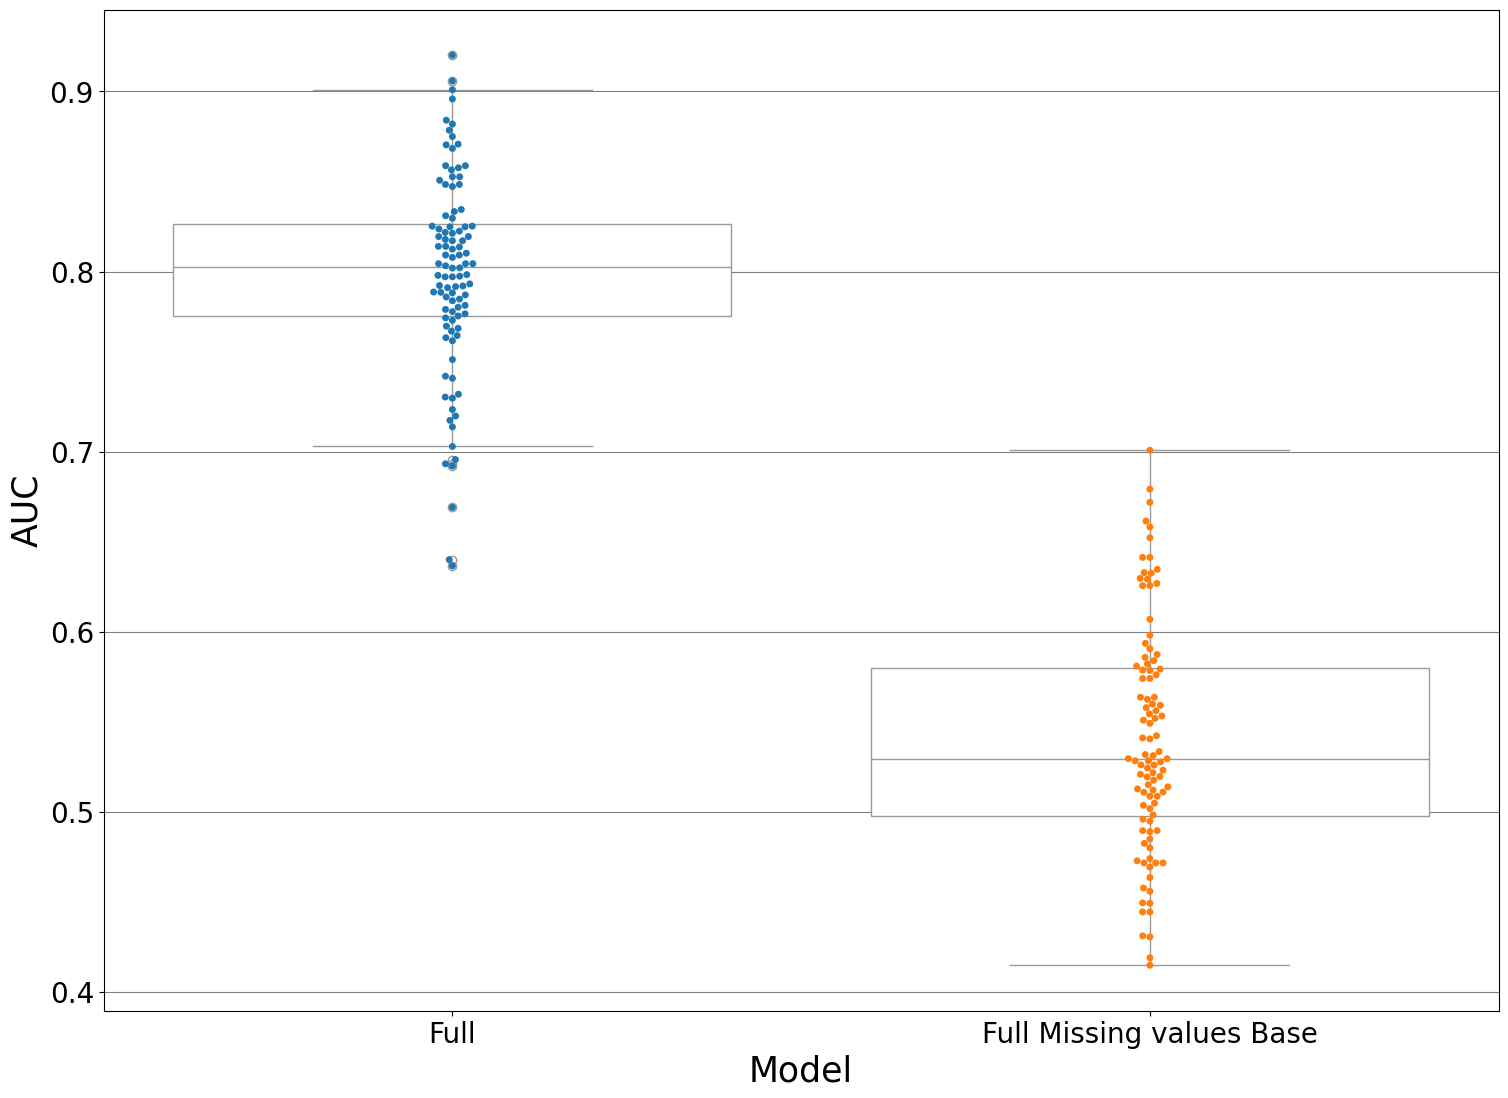

In [3]:
from statannot.statannot import add_stat_annotation

data_dir = "../../code/missing_value_analysis/output/missing_values/"

results_missing = pd.read_csv(data_dir +"Full_base_missing.csv", index_col=0)
results_missing["Model"] = "Full Missing values Base"

data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/full_model/"

results_24hs = pd.read_csv(data_dir + "Full_random_remove.csv", index_col=0)
results_24hs = results_24hs[results_24hs["Thresholds"] == 0.5]
results_24hs = results_24hs[results_24hs["Number of Removed Features"] == 0]


results_df = pd.concat([results_24hs,results_missing])

results_true_label = results_df[results_df["Random State"]== False]
metric_to_plot="AUC"
models_to_plot = ["Full", "Full Missing values Base"]
fig, ax = plt.subplots(1, 1, figsize=[18, 13])
plt.grid()
sns.boxplot(x="Model", y="AUC", data=results_true_label, color="white", ax=ax)
sns.swarmplot(
    data=results_true_label,
    x="Model", y=metric_to_plot,
    dodge=False, ax=ax,
    hue="Model"
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:models_to_plot.__len__()], labels[:models_to_plot.__len__()])
ax.legend(["True labels", "Randomized labels"])

# Comparisons for statistical test
box_list = [

            (("Full"), ("Full Missing values Base")),

            ]

plt.legend([], frameon=False)
# add_stat_annotation(ax, data=results_true_label, x="Model", y=metric_to_plot,
#                     box_pairs=box_list, test='Mann-Whitney',
#                     text_format='star', loc='inside',
#                     verbose=1,
#                     pvalue_thresholds=[[1, "ns"], [0.001, "*p<0.001"]])

plt.grid(alpha=0.5, axis="y", c="black")


print(results_missing["AUC"].mean())
print(results_24hs["AUC"].mean())

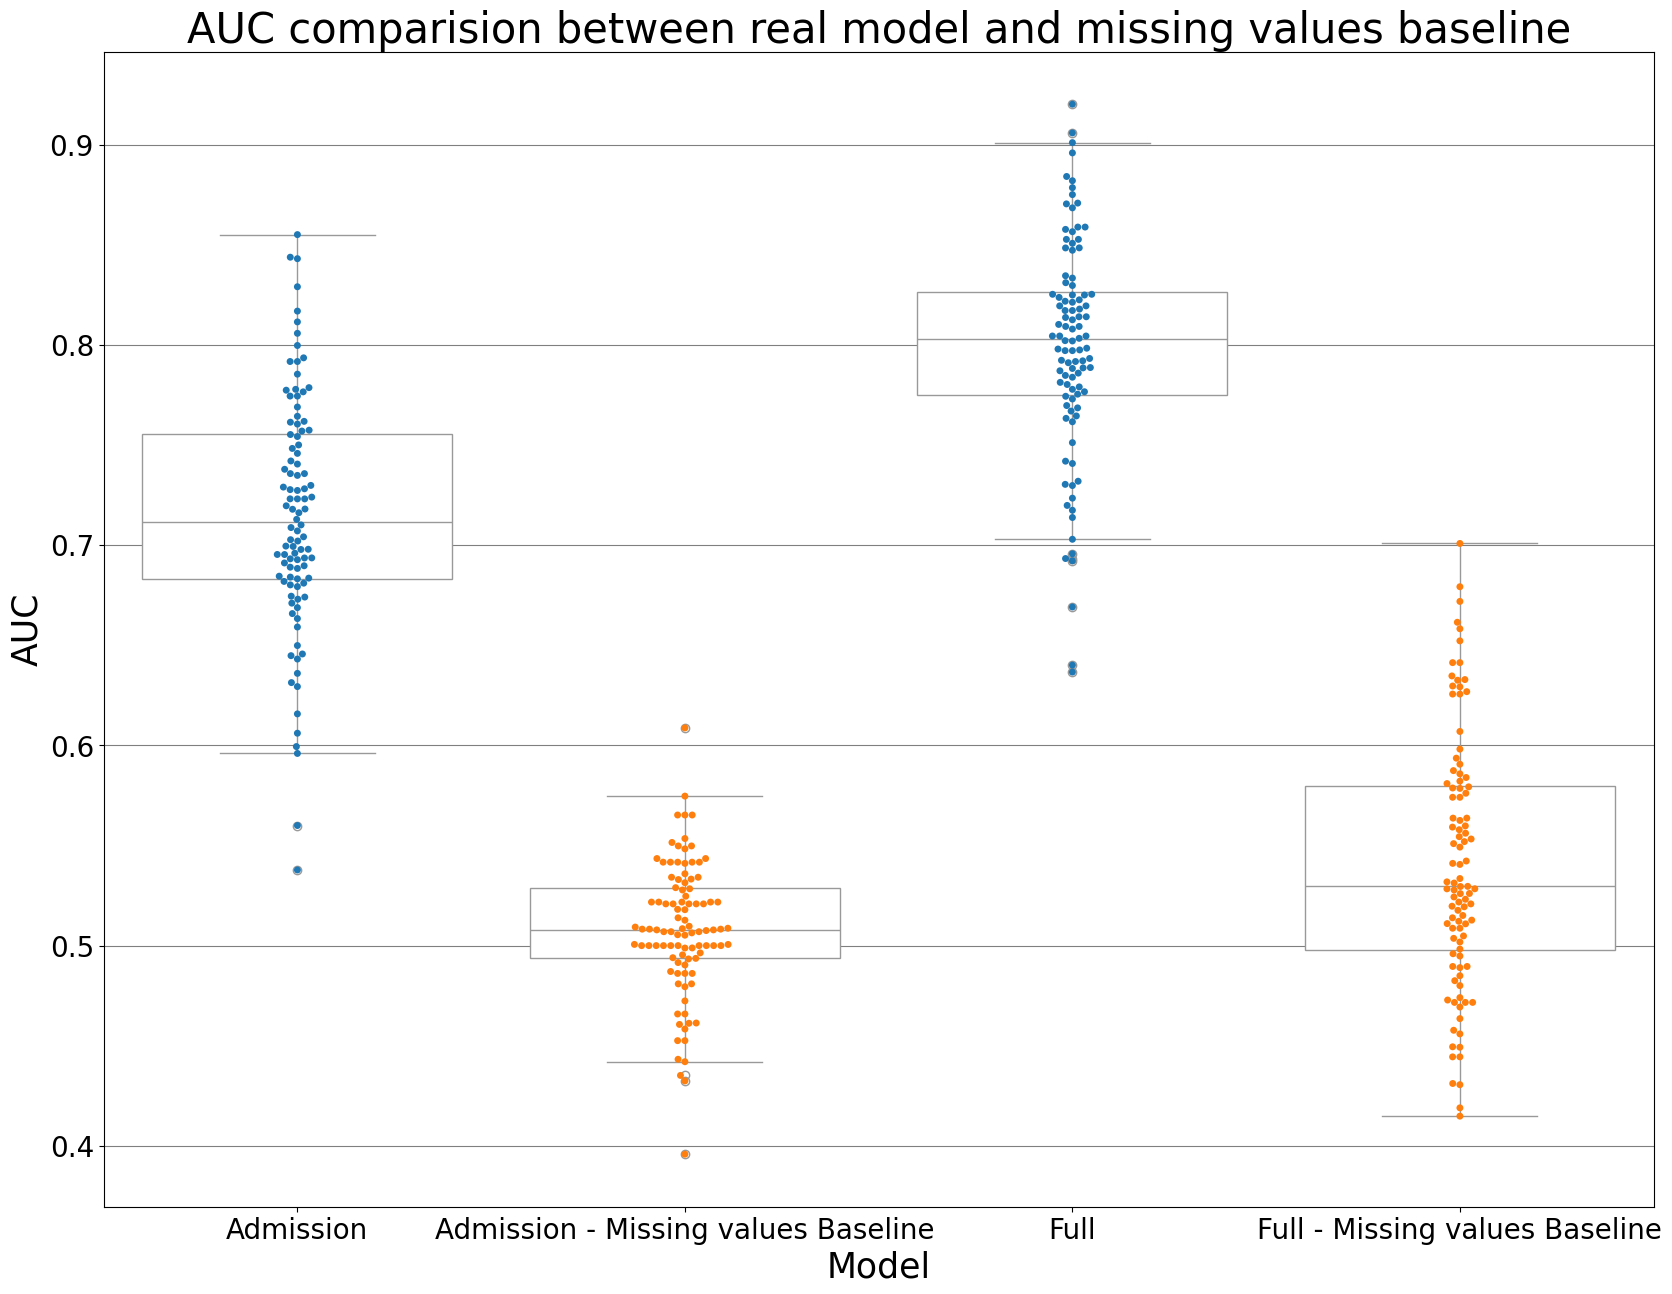

In [ ]:
data_dir = "../../code/missing_value_analysis/output/missing_values/"

results_missing = pd.read_csv(data_dir +"Admission_base_missing.csv", index_col=0)
results_missing["Model"] = "Admission - Missing values Baseline"
results_missing["Missing"] = True
data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"

results_admission = pd.read_csv(data_dir + "Admission_random_remove.csv", index_col=0)
results_admission = results_admission[results_admission["Thresholds"] == 0.5]
results_admission = results_admission[results_admission["Number of Removed Features"] == 0]
results_admission["Missing"] = False
results_admission_v2 = pd.concat([results_admission, results_missing])
results_admission_v2 = results_admission_v2[results_admission_v2["Random State"]== False]


results_df = results_admission_v2
data_dir = "../../code/missing_value_analysis/output/missing_values/"

results_missing = pd.read_csv(data_dir +"Full_base_missing.csv", index_col=0)
results_missing["Model"] = "Full - Missing values Baseline"
results_missing["Missing"] = True

data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/full_model/"

results_24hs = pd.read_csv(data_dir + "Full_random_remove.csv", index_col=0)
results_24hs = results_24hs[results_24hs["Thresholds"] == 0.5]
results_24hs = results_24hs[results_24hs["Number of Removed Features"] == 0]
results_24hs["Missing"] = False


results_df = pd.concat([results_24hs,results_missing, results_admission_v2])

results_true_label = results_df[results_df["Random State"]== False]
metric_to_plot="AUC"
models_to_plot = ["Admission", "Admission - Missing values Baseline", "Full", "Full - Missing values Baseline", ]
fig, ax = plt.subplots(1, 1, figsize=[20, 15])
plt.grid()
sns.boxplot(x="Model", y="AUC", data=results_true_label, color="white", ax=ax, order=models_to_plot)
sns.swarmplot(
    data=results_true_label,
    x="Model", y=metric_to_plot,
    dodge=False, ax=ax,
    hue="Missing"
)
handles, labels = ax.get_legend_handles_labels()


plt.title("AUC comparision between real model and missing values baseline")
plt.legend([], frameon=False)


plt.grid(alpha=0.5, axis="y", c="black")


In [6]:
import scipy.stats as stats



models_to_plot = ["Full Model - Missing values Baseline", "Admission Model - Missing values Baseline"]


metrics = ["Balanced ACC",
           "AUC",
           "F1",
           "Specificity",
           "Sensitivity"]

for model in models_to_plot:
    print(model)
    for metric in metrics:
        results_mean = round(results_true_label[results_true_label["Model"] == model][metric].mean(),3)
        results_std = round(results_true_label[results_true_label["Model"] == model][metric].std(),3)
        confidence_interval = stats.t.interval(0.95, len(results_true_label[results_true_label["Model"] == model][metric]) - 1, loc=results_mean, scale=results_std)

        print(metric + ": " + str(results_mean) + " ["+str(round(confidence_interval[0],3)) + "/" + str(round(confidence_interval[1],3))+"]")



Full Model - Missing values Baseline
Balanced ACC: 0.527 [0.444/0.61]
AUC: 0.541 [0.416/0.666]
F1: 0.251 [0.025/0.477]
Specificity: 0.875 [0.732/1.018]
Sensitivity: 0.18 [-0.007/0.367]
Admission Model - Missing values Baseline
Balanced ACC: 0.506 [0.466/0.546]
AUC: 0.508 [0.443/0.573]
F1: 0.064 [-0.075/0.203]
Specificity: 0.977 [0.917/1.037]
Sensitivity: 0.036 [-0.045/0.117]
